In [2]:
import numpy as np
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster
#models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [33]:
df=pd.read_csv('new2.csv')

In [34]:
df

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0
...,...,...,...,...,...,...,...
1477,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0
1478,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0
1479,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0
1480,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0


### `Labelling Using Clusters`

In [35]:
x=df[['lattitude',	'longitude']]

<Axes: xlabel='lattitude', ylabel='longitude'>

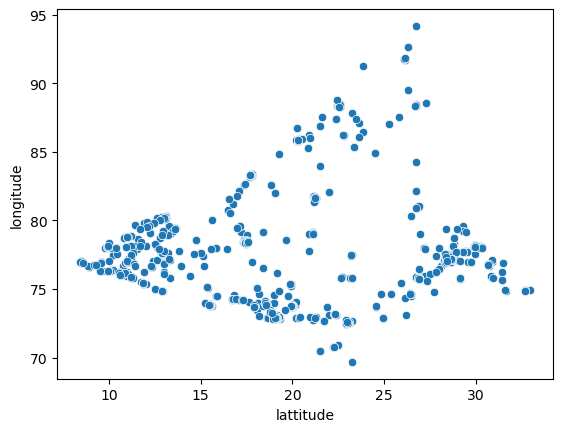

In [36]:
sns.scatterplot(data=x, x='lattitude', y='longitude')

In [37]:
pca=PCA()
x_pca=pca.fit_transform(x)

In [38]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(x_pca)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [39]:
pd.Series(kmean.labels_).value_counts()

3    496
0    423
1    400
2    163
Name: count, dtype: int64

In [40]:
df['clusters'] = kmean.labels_

In [41]:
df

,name,state,city,address,lattitude,longitude,type,clusters
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...
1477,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,3
1478,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1479,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1480,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [42]:
df["clusters"].value_counts()

clusters
3    496
0    423
1    400
2    163
Name: count, dtype: int64

In [43]:
Cluster_0=df[df.clusters==0]
Cluster_1=df[df.clusters==1]
Cluster_2=df[df.clusters==2]
Cluster_3=df[df.clusters==3]

In [44]:
[Cluster_0["state"].value_counts().head(),
Cluster_1["state"].value_counts().head(),
Cluster_2["state"].value_counts().head(),
Cluster_3["state"].value_counts().head()]
# target 27-30 years

[state
 Maharashtra       194
 Gujarat            67
 Telangana          52
 Madhya Pradesh     15
 Karnataka          12
 Name: count, dtype: int64,
 state
 Delhi            106
 Uttar Pradesh     69
 Delhi NCR         53
 Rajasthan         46
 Haryana           45
 Name: count, dtype: int64,
 state
 West Bengal     42
 Odisha          34
 Jharkhand       18
 Chhattisgarh    12
 Assam           10
 Name: count, dtype: int64,
 state
 Tamil Nadu        169
 Karnataka         105
 Kerala             77
 Andhra Pradesh     41
 Maharashtra        32
 Name: count, dtype: int64]

In [45]:
[Cluster_0["city"].value_counts().head(),
Cluster_1["city"].value_counts().head(),
Cluster_2["city"].value_counts().head(),
Cluster_3["city"].value_counts().head()]

[city
 Mumbai       65
 Hyderabad    61
 Pune         35
 Ahmedabad    23
 pune         17
 Name: count, dtype: int64,
 city
 Delhi        82
 New Delhi    67
 Gurgaon      25
 Noida        22
 Jaipur       17
 Name: count, dtype: int64,
 city
 Kolkata          19
 Bhubaneswar      17
 Jamshedpur       10
 visakhapatnam     8
 Raipur            8
 Name: count, dtype: int64,
 city
 bengaluru           107
 Chennai              76
 kochi                11
 Thiruvanthapuram     10
 Kochi                 9
 Name: count, dtype: int64]

In [48]:
print("CLUSTER 1:")
Cluster_0["state"].value_counts().head()

CLUSTER 1:


state
Maharashtra       194
Gujarat            67
Telangana          52
Madhya Pradesh     15
Karnataka          12
Name: count, dtype: int64

In [49]:
print("CLUSTER 2:")
Cluster_1["state"].value_counts().head()


CLUSTER 2:


state
Delhi            106
Uttar Pradesh     69
Delhi NCR         53
Rajasthan         46
Haryana           45
Name: count, dtype: int64

In [50]:
print("CLUSTER 3:")
Cluster_2["state"].value_counts().head()


CLUSTER 3:


state
West Bengal     42
Odisha          34
Jharkhand       18
Chhattisgarh    12
Assam           10
Name: count, dtype: int64

In [51]:
print("CLUSTER 4:")
Cluster_3["state"].value_counts().head()


CLUSTER 4:


state
Tamil Nadu        169
Karnataka         105
Kerala             77
Andhra Pradesh     41
Maharashtra        32
Name: count, dtype: int64

In [52]:
print("CLUSTER 1:")
Cluster_0["city"].value_counts().head()

CLUSTER 1:


city
Mumbai       65
Hyderabad    61
Pune         35
Ahmedabad    23
pune         17
Name: count, dtype: int64

In [53]:
print("CLUSTER 2:")
Cluster_1["city"].value_counts().head()


CLUSTER 2:


city
Delhi        82
New Delhi    67
Gurgaon      25
Noida        22
Jaipur       17
Name: count, dtype: int64

In [54]:
print("CLUSTER 3:")
Cluster_2["city"].value_counts().head()


CLUSTER 3:


city
Kolkata          19
Bhubaneswar      17
Jamshedpur       10
visakhapatnam     8
Raipur            8
Name: count, dtype: int64

In [55]:
print("CLUSTER 4:")
Cluster_3["city"].value_counts().head()


CLUSTER 4:


city
bengaluru           107
Chennai              76
kochi                11
Thiruvanthapuram     10
Kochi                 9
Name: count, dtype: int64